In [1]:
using Pkg
Pkg.activate("/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis")
using AvailablePotentialEnergyFramework, PyCall,PyPlot, Statistics, JLD; tkr = pyimport("matplotlib.ticker")# import FormatStrFormatter

 Activating environment at `/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/Project.toml`


PyObject <module 'matplotlib.ticker' from '/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/matplotlib/ticker.py'>

In [2]:
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_1km/"

"/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_1km/"

In [3]:
# apes_1daysmooth_f5e-4_2km_1000km_homoAll_homoSfc_part_1.jld
function gatherapes(data_dir,exp_name)
            int_ape = Float32[]
            int_ape_ke = Float32[]
            int_ape_dia = Float32[]
            int_ape_rad = Float32[]
            int_ape_ub2 =Float32[]
            int_ape_vb2 = Float32[]
            int_ape_wn2 = Float32[]
            int_ape_rate = Float32[]
            int_ape_Fs = Float32[]
    for iter in 1:6
    file_name = string(exp_name,iter,".jld")
    file_path = joinpath(data_dir,file_name)
        file = jldopen(file_path, "r", mmaparrays=true)
            append!(int_ape,read(file, "int_APE"))
            append!(int_ape_ke,read(file, "int_KE"))
            append!(int_ape_dia,read(file, "int_DIA"))
            append!(int_ape_rad,read(file, "int_RAD"))
            append!(int_ape_ub2,read(file, "int_Ub2"))
            append!(int_ape_vb2,read(file, "int_Vb2"))
            append!(int_ape_wn2,read(file, "int_WN2"))
            append!(int_ape_rate,read(file, "int_APE_rate"))
            append!(int_ape_Fs,read(file, "APE_Fs"))
        close(file)
    end
    residual = int_ape_rate .-  int_ape_rad .-  int_ape_dia .+  int_ape_ub2 .+ int_ape_vb2 .+  int_ape_wn2 .- int_ape_Fs
    return int_ape, int_ape_ke, int_ape_rad, int_ape_dia, int_ape_ub2.+int_ape_vb2, int_ape_wn2, int_ape_Fs, residual, int_ape_rate
end


gatherapes (generic function with 1 method)

In [4]:
function filter_n_times(x,smooth_time,n)
	if n <= 1
		return filter_array_time(x,smooth_time,1)
	else
        for ii in n:-1:1
 	          x=filter_array_time(x,smooth_time,1)
         end
	end
           x
end

filter_n_times (generic function with 1 method)

In [5]:
exp_name = "f5e-4_1km_1000km_homoRad_homoSfc"
file_name = string(exp_name,1,".jld")
file_path = joinpath(data_dir,file_name)

"/global/cscratch1/sd/aramreye/for_postprocessing/ApeBudgetOutputs_1km/f5e-4_1km_1000km_homoRad_homoSfc1.jld"

In [7]:
int_APE_homoRad_homoSfc = gatherapes(data_dir,"f5e-4_1km_1000km_homoRad_homoSfc_reduced");
times = range(0,stop=30,length=360)

0.0:0.08356545961002786:30.0

In [24]:
smooth_window = 4
times_to_smooth=2
int_APE_homoRad_homoSfc_smooth = filter_n_times.(int_APE_homoRad_homoSfc,smooth_window,times_to_smooth)

([8.09758061170578, 8.513382315635681, 9.06269383430481, 9.618706226348877, 10.136084020137787, 10.616184771060944, 11.074748754501343, 11.528821408748627, 11.998952746391296, 12.500175952911377  …  25324.291259765625, 25449.786865234375, 25610.339477539062, 25800.823608398438, 26015.4169921875, 26250.979248046875, 26485.19921875, 26679.709594726562, 26813.416259765625, 26864.25830078125], [6.9776291847229, 7.3277318477630615, 7.813746005296707, 8.348280251026154, 8.901924759149551, 9.472372233867645, 10.065345764160156, 10.684690356254578, 11.338471531867981, 12.034058392047882  …  64842.833740234375, 65331.91064453125, 65850.09619140625, 66374.2587890625, 66891.60766601562, 67401.50537109375, 67875.18505859375, 68254.0458984375, 68508.32421875, 68604.15625], [-1.714207292025094e-5, -1.4380945572156634e-5, -1.3219212064541352e-5, -1.017667818814516e-5, -4.05836675554383e-6, -1.9317546247066275e-6, 3.885608236942062e-6, 5.419396970296475e-6, 2.2692048844419332e-6, 1.5494365328549975e-6

In [29]:
experiment_labels = ["Control" "HomoRad" "HomoSfc" "HomoAll"]
budget_labels = ["APE" "Kinetic e." "Rad" "Convec" "Advec" "W*b" "Surface fluxes" "Residual" "APE change rate"]
plot_labels = ["a" "b" "c" "d" "e"]

1×5 Array{String,2}:
 "a"  "b"  "c"  "d"  "e"

In [10]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=14)
legend_fontsize, plotlabel_fontsize = 12,16
#legend_fontsize, plotlabel_fontsize = 6,8

(12, 16)

In [11]:
#these times come from the notebook time_comparisons_mechanismdenial
genesis_homoRad_homoSfc = 15

15

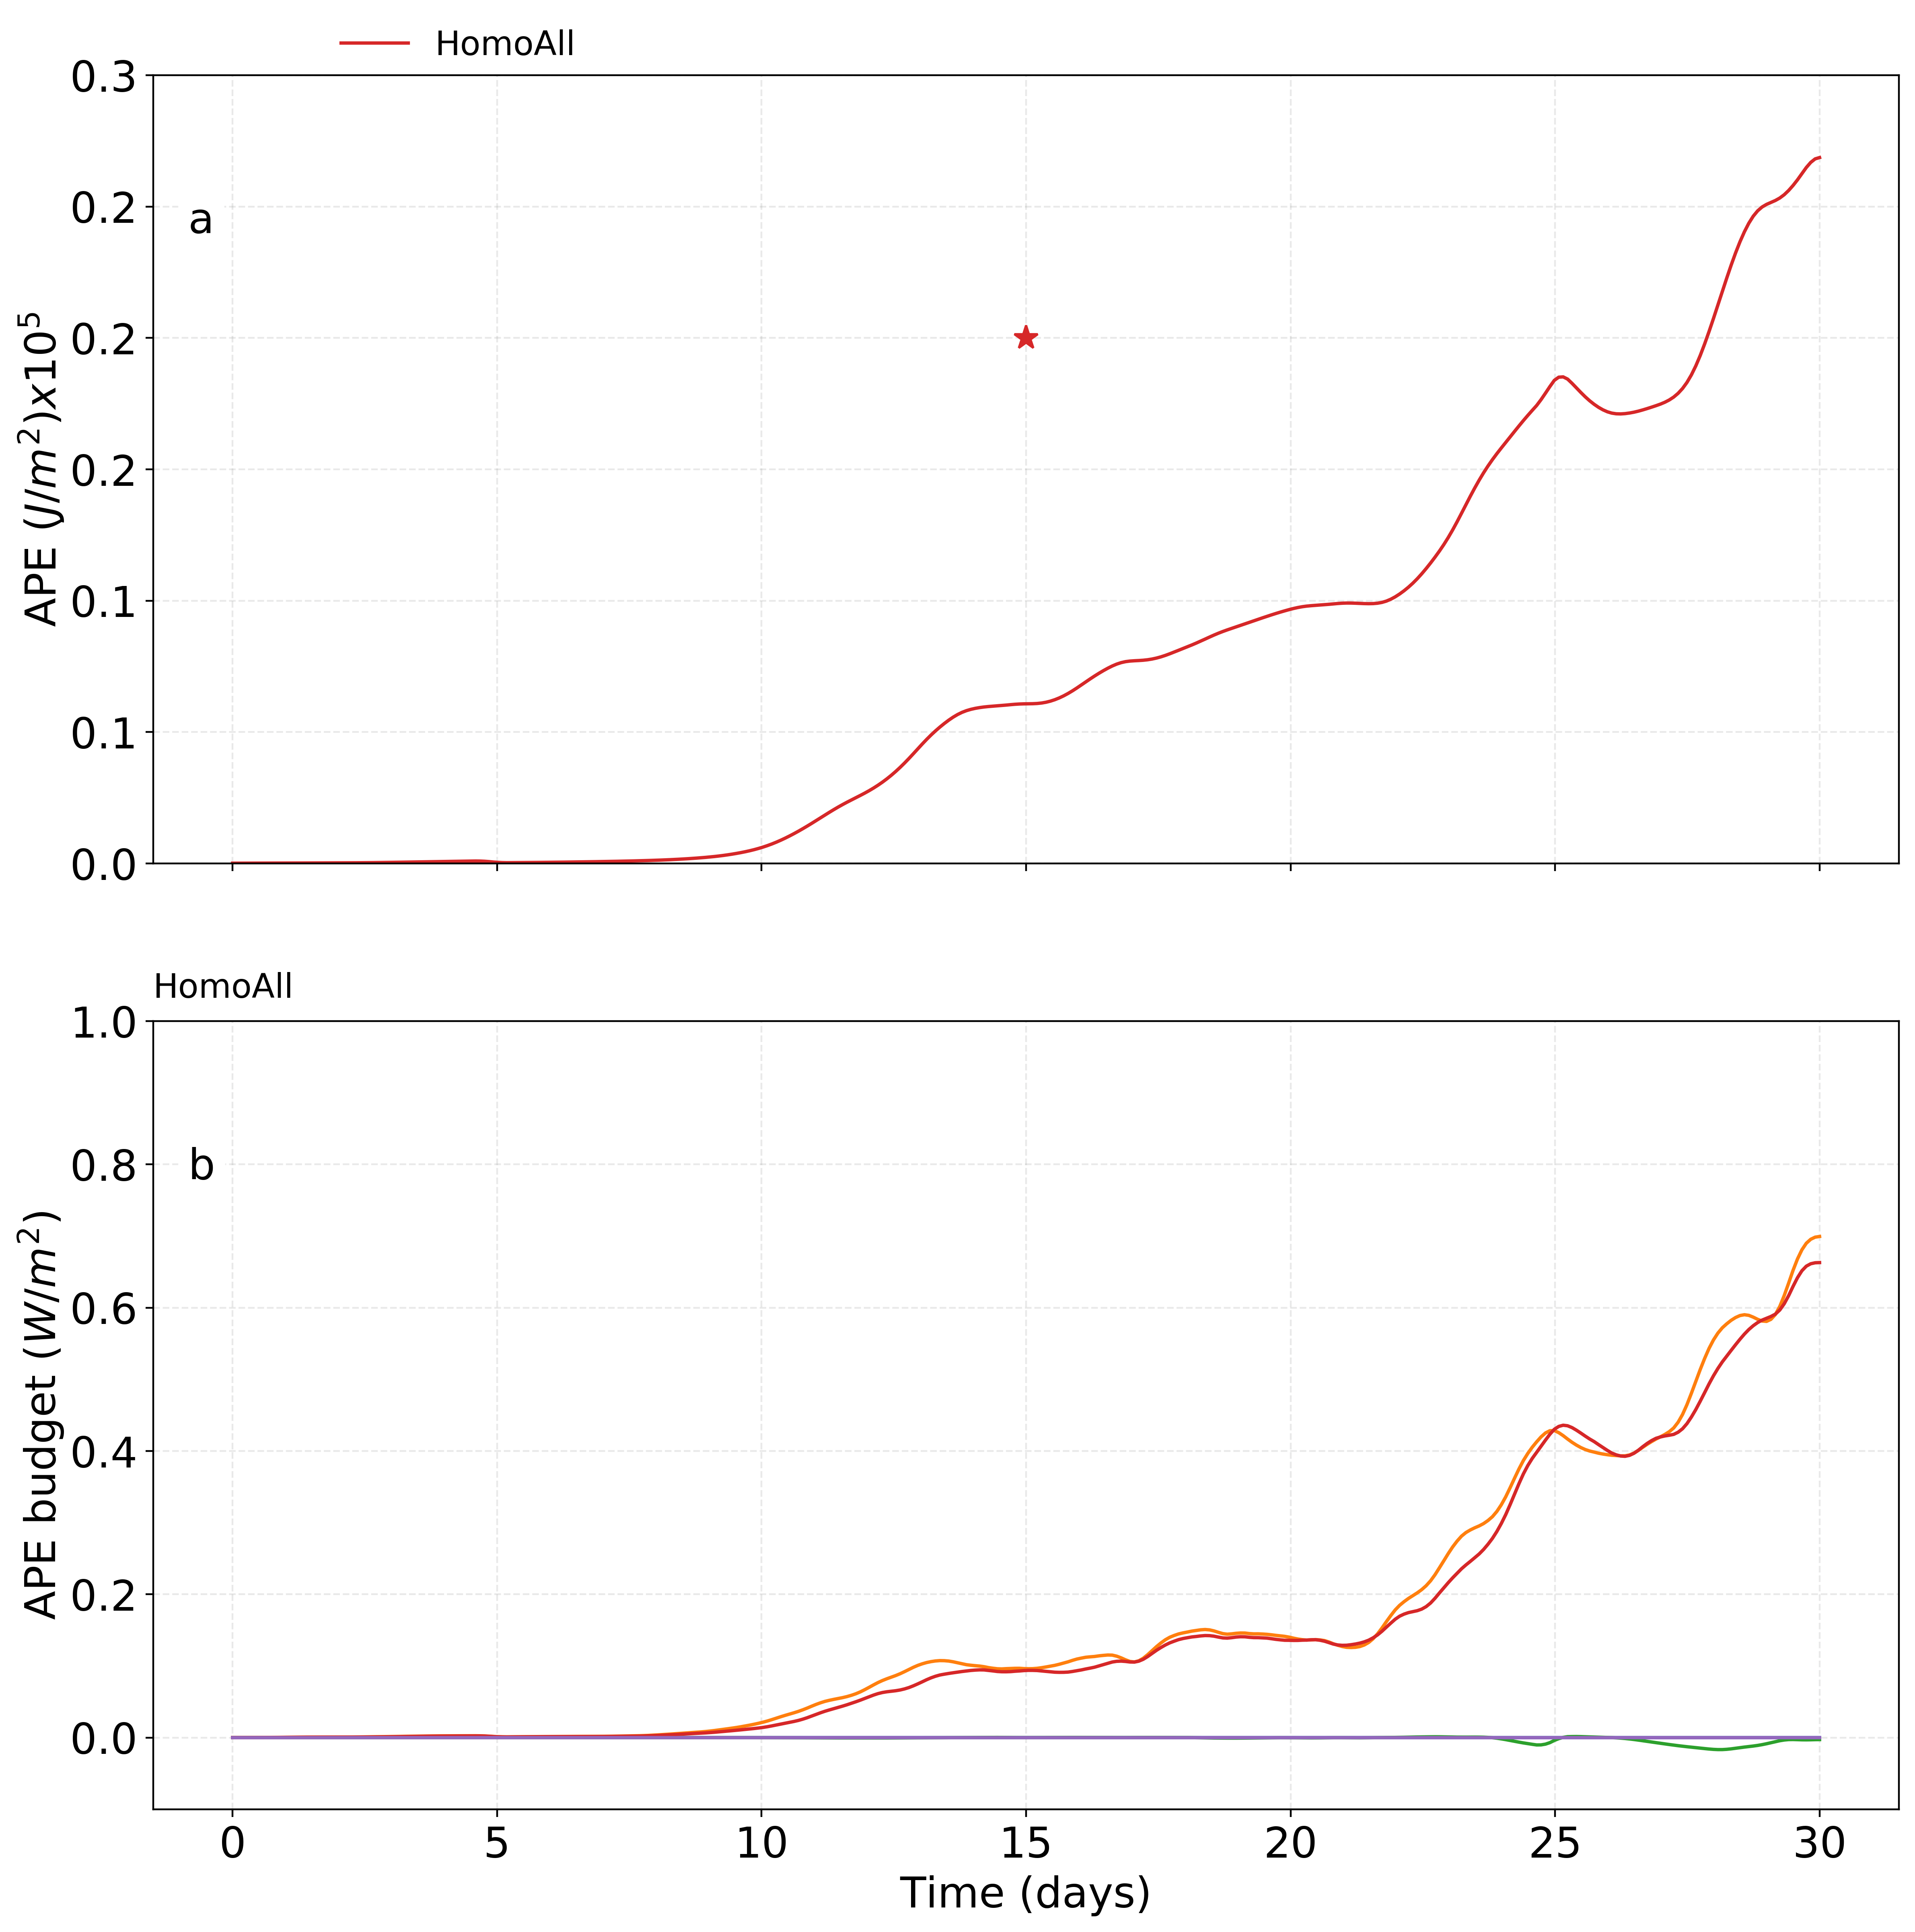

No handles with labels found to put in legend.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artis

In [30]:
PyPlot.matplotlib.rc("font", family="sans-serif",size=19)
legend_fontsize, plotlabel_fontsize = 15,16
fig, ax = plt.subplots(2,1,sharex=true,figsize=(14,14),dpi=400)
p4, = ax[1].plot(times,1e-5int_APE_homoRad_homoSfc_smooth[1],label = experiment_labels[4], "C3")
ax[1].set_ylabel(string("APE ", L"(J/m^2)",L"x10^5"))
ax[1].yaxis.set_label_coords(-0.05,0.5)
ax[1].yaxis.set_major_formatter(tkr.FormatStrFormatter("%1.1f"))
ax[1].plot(genesis_homoRad_homoSfc,[0.2],"*",markersize=11,color=p4.get_color())

for variable in 3:7
   ax[2].plot(times,int_APE_homoRad_homoSfc_smooth[variable])
end 
for plotid in 1:2
    ax[plotid].annotate(plot_labels[plotid], xy=(0.02, 0.8), xycoords="axes fraction",backgroundcolor="white")
    ax[plotid].grid(b=true,which="both",color="xkcd:gray", linestyle="--",alpha=0.2)
    if plotid > 1
        ax[plotid].text(-0.0, 1.03, experiment_labels[4], transform=ax[plotid,1].transAxes, size=legend_fontsize)
    end
end


ax[2].set_ylabel(string("APE budget ", L"(W/m^2)"))
ax[2].yaxis.set_label_coords(-0.05,0.5)      
ax[2].set_xlabel("Time (days)")
ax[1].set_ylim(0.0,0.3)
[ax[i].set_ylim(-0.1,1.0) for i in 2:2]

ax[1].legend(loc = (0.1, 1), ncol=4 ,frameon=false,fontsize=legend_fontsize) 
ax[2].legend(loc = (0.1, 1), ncol=8 ,frameon=false,fontsize=legend_fontsize)
ax[1].xaxis.set_minor_locator(tkr.MultipleLocator(5))
ax[1].yaxis.set_minor_locator(plt.NullLocator())

savefig(joinpath(output_dir,"ape_budgets_1km.png"))
savefig(joinpath(output_dir,"ape_budgets_1km.eps"))
savefig(joinpath(output_dir,"ape_budgets_1km.pdf"))